In [1]:
import networkx as nx
import fast_model_improved as fmi
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

In [13]:
from pyexpat import model

def create_network(network_type='random', num_nodes=1000, num_edges=0):
    if network_type == 'random':
        G = nx.gnm_random_graph(num_nodes, num_edges)
    elif network_type == 'scale_free':
        G = nx.scale_free_graph(num_nodes)
    elif network_type == 'erdos_renyi':
        G = nx.erdos_renyi_graph(num_nodes, 0.005)
    elif network_type == 'preferential_attachment':
        G = nx.barabasi_albert_graph(num_nodes, 2)
    elif network_type == 'small_world':
        G = nx.watts_strogatz_graph(num_nodes, k=4, p=0.1)
    else:
        raise ValueError("Unsupported network type")
    return G

def choose_influencers(model, num_influencers, method='random'):
    if method == 'random':
        return model.random_influencers(num_influencers)
    elif method == 'hill_climbing':
        return model.greedy_hill_climbing(num_influencers, steps=10, R=10)
    else:
        raise ValueError("Unsupported method for selecting influencers")

def run_influence_cascade(graph, num_influencers, steps, selection_method='random'):

    # Initialize the model
    model = fmi.InfluenceDeinfluenceModel(graph,'random')
    
    # Choose influencers
    influencers = choose_influencers(model, num_influencers, method=selection_method)
    model.set_influencers(influencers)
    model.selected_influencers = influencers
    
    # Run the cascade
    model.run_cascade(steps)
    
    # Return the updated graph and model
    return model

def run_simple_cascade(steps):
    model.set_influencers(model.selected_influencers)
    model.run_cascade(steps)
    return model


In [14]:
# Define the combined count function
def count_deinfluenced(model, deinfluencers, num_runs, steps):
    total_deinfluenced = 0
    total_influenced = 0
    model.reset_transition_counts()
    total_transition_counts = {'I->S': 0, 'D->S': 0, 'D->I': 0}
    for _ in range(num_runs):
        model.reset_graph()
        run_simple_cascade(steps)
        model.set_deinfluencers(deinfluencers)
        model.run_cascade(steps)
        total_deinfluenced += model.evaluate_deinfluence()
        total_influenced += model.evaluate_influence()
        for key in total_transition_counts:
            total_transition_counts[key] += model.transition_counts[key]
        model.reset_graph()
    return total_deinfluenced / num_runs, total_influenced / num_runs, {key: total / num_runs for key, total in total_transition_counts.items()}

In [15]:
G = create_network('erdos_renyi')
model = run_influence_cascade(G, num_influencers=10, steps=5, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")

Number of influenced nodes: 714
Number of deinfluenced nodes: 0
Number of susceptible nodes: 286


In [16]:
# Generate the graph
# G = nx.erdos_renyi_graph(100, 0.1, directed=True)
# G = nx.watts_strogatz_graph(100, 4, 0.1).to_directed()
G = nx.barabasi_albert_graph(500, 2).to_directed()

# Initialize the InfluenceDeinfluenceModel
model = fmi.InfluenceDeinfluenceModel(G,"fixed")

# number of influencers
k = 5

# number of steps
steps = 3
influencers = model.greedy_hill_climbing(k, steps)

model.reset_graph()
#model.set_initial_states()

print("Influencers:", influencers)

Influencers: {2, 3, 4, 6, 16}


In [17]:
# Generate the graph
# G = nx.erdos_renyi_graph(100, 0.1, directed=True)
# G = nx.watts_strogatz_graph(100, 4, 0.1).to_directed()
G = nx.barabasi_albert_graph(500, 1).to_directed()

# Initialize the InfluenceDeinfluenceModel
model = fmi.InfluenceDeinfluenceModel(G,"fixed", 1)

# number of influencers
k = 5

# number of steps
steps = 3
influencers = model.greedy_hill_climbing(k, steps)
print("Influencers:", influencers)
model.set_influencers(influencers)
model.selected_influencers = influencers

# # Run the cascade
# run_steps = 2
# model.run_cascade(steps)

#model.reset_graph()
#model.set_initial_states()

Influencers: {0, 8, 12, 77, 14}


In [18]:
model.set_influencers(influencers)
run_steps = 1
model.run_cascade(steps)
# model.reset_graph()
# model.set_initial_states()

Number of influenced nodes: 422
Number of deinfluenced nodes: 0
Number of susceptible nodes: 78
Deinfluencers from influencers based on initial influencers: [8, 0, 77]
Ranked deinfluencers from influencers based on initial influencers: [12, 8, 14]
Deinfluencers from influencers based on all influencers: [266, 204, 420]
Ranked deinfluencers from influencers based on all influencers: [12, 8, 4]
Results for deinfluenced nodes:
Random: 68.00 nodes deinfluenced on average
RanExIni_Inf: 142.00 nodes deinfluenced on average
RanExAll_Inf: 25.00 nodes deinfluenced on average
Degree: 376.00 nodes deinfluenced on average
Closeness: 387.00 nodes deinfluenced on average
Betweenness: 387.00 nodes deinfluenced on average
Eigenvector: 350.00 nodes deinfluenced on average
PageRank: 376.00 nodes deinfluenced on average
RIniInfluencers: 378.00 nodes deinfluenced on average
RInfluencers: 153.00 nodes deinfluenced on average
RRankedIniInfluencers: 302.00 nodes deinfluenced on average
RRankedInfluencers: 37

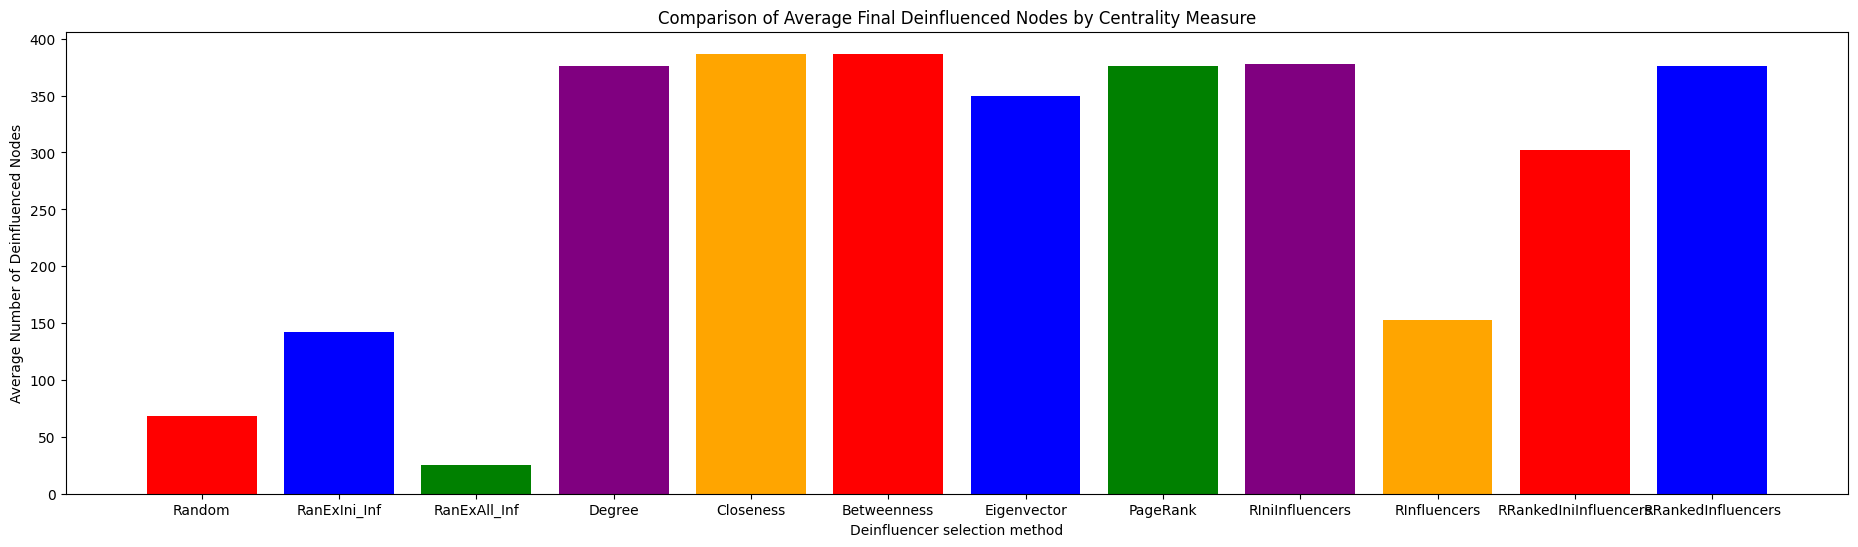

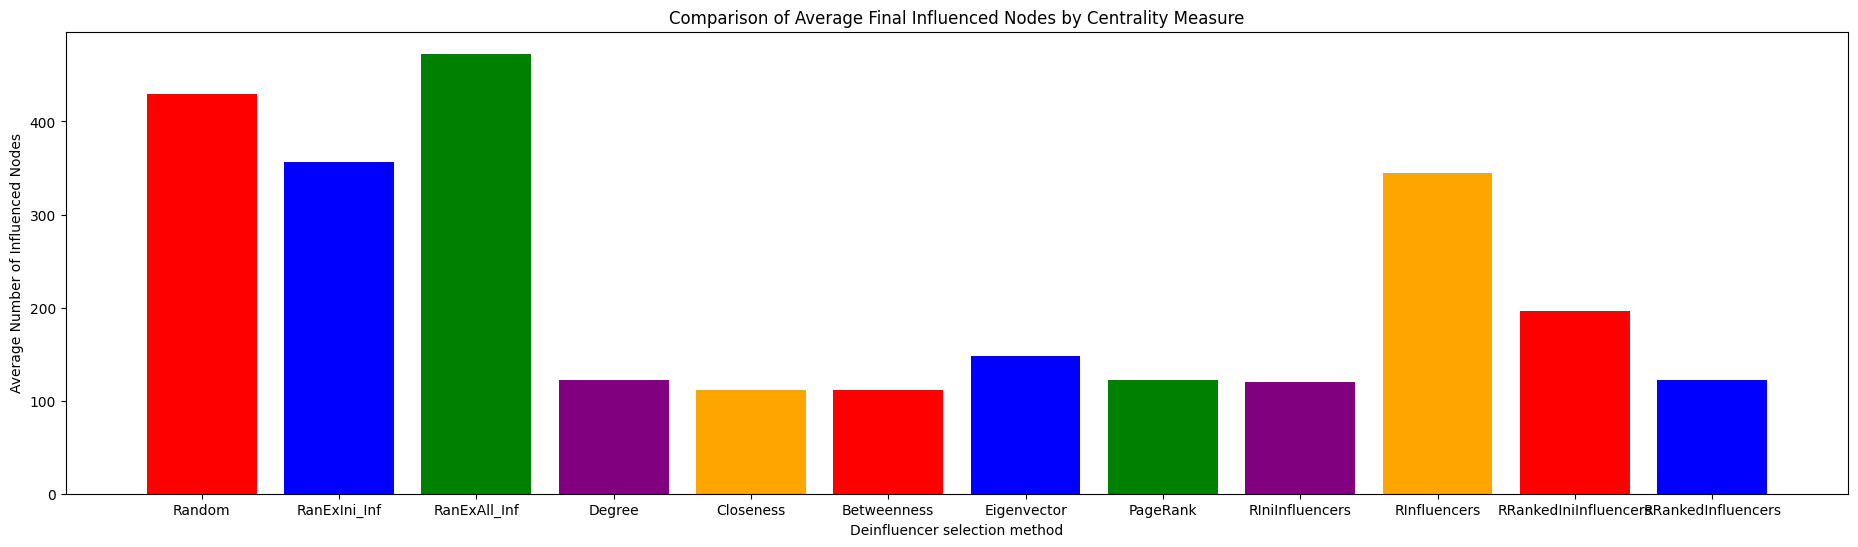

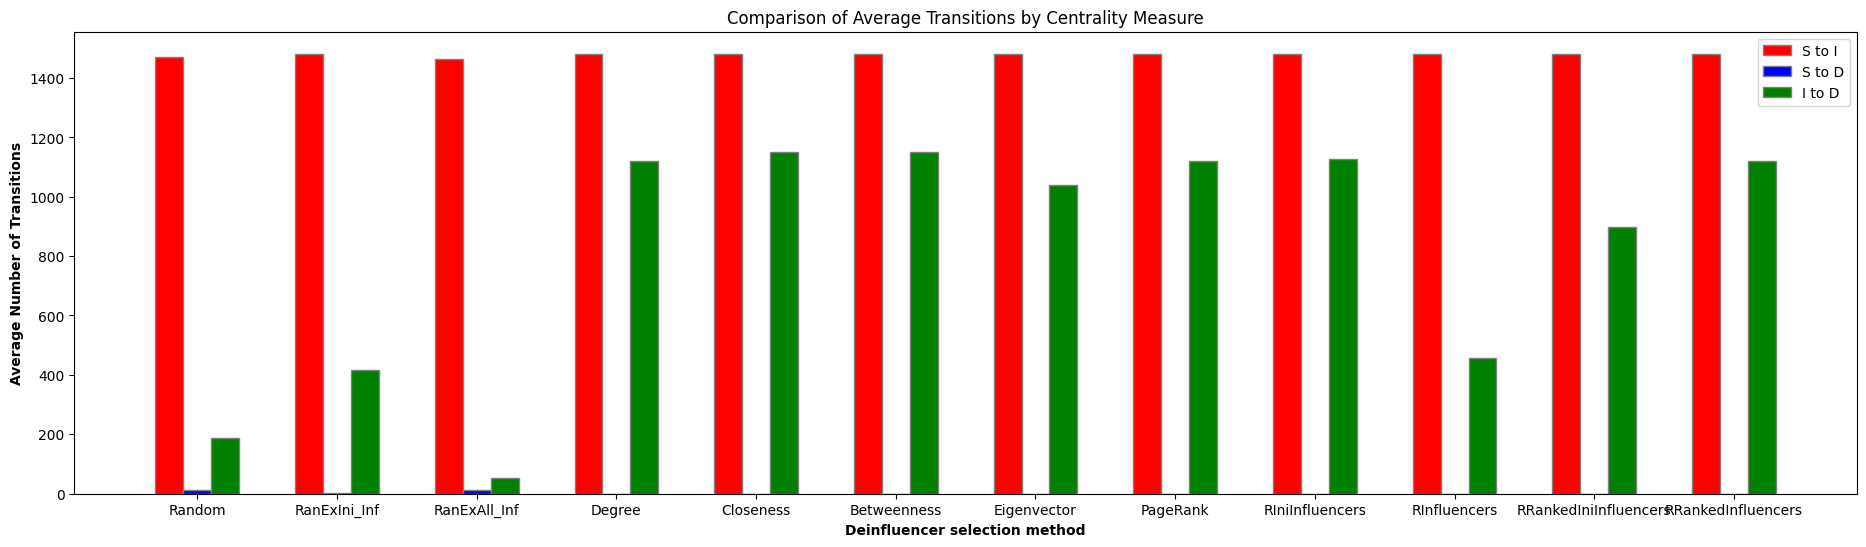

<bound method InfluenceDeinfluenceModel.reset_graph of <fast_model_improved.InfluenceDeinfluenceModel object at 0x123125c10>>

In [19]:
# G = create_network('erdos_renyi')
# model = run_influence_cascade(G, num_influencers=10, steps=5, selection_method='random')
# Evaluate the influence and deinfluence

num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")

k_deinfluencers = 3

optimized_influencers = model.selected_influencers

# Determine deinfluencers using different methods
random_deinfluencers = model.select_deinfluencers_random(k_deinfluencers)
random_besides_ini_influencers = model.select_deinfluencers_from_not_ini_influencers(k_deinfluencers)
random_besides_all_influencers = model.select_deinfluencers_from_not_influencers(k_deinfluencers)

# Centralities disregard the influencers
degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers, max_iter=1000, tol=1e-06)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)

# Select deinfluencers based on initial influencers
deinfluencers_from_influencers_ini = model.select_deinfluencers_from_ini_influencers(j=k_deinfluencers)
ranked_deinfluencers_from_influencers_ini = model.select_deinfluencers_from_ini_influencers_degree_centrality(k_deinfluencers)

print("Deinfluencers from influencers based on initial influencers:", deinfluencers_from_influencers_ini)
print("Ranked deinfluencers from influencers based on initial influencers:", ranked_deinfluencers_from_influencers_ini)

# Select deinfluencers based on all influencers
deinfluencers_from_influencers = model.select_deinfluencers_from_influencers(j=k_deinfluencers)
ranked_deinfluencers_from_influencers = model.select_deinfluencers_from_influencers_degree_centrality(k_deinfluencers)

print("Deinfluencers from influencers based on all influencers:", deinfluencers_from_influencers)
print("Ranked deinfluencers from influencers based on all influencers:", ranked_deinfluencers_from_influencers)

# Compare strategies
num_runs = 5
steps = 3

results = {
    'Random': count_deinfluenced(model, random_deinfluencers, num_runs, steps),
    'RanExIni_Inf': count_deinfluenced(model, random_besides_ini_influencers, num_runs, steps),
    'RanExAll_Inf': count_deinfluenced(model, random_besides_all_influencers, num_runs, steps),
    'Degree': count_deinfluenced(model, degree_centrality_ranking, num_runs, steps),
    'Closeness': count_deinfluenced(model, closeness_centrality_ranking, num_runs, steps),
    'Betweenness': count_deinfluenced(model, betweenness_centrality_ranking, num_runs, steps),
    'Eigenvector': count_deinfluenced(model, eigenvector_centrality_ranking, num_runs, steps),
    'PageRank': count_deinfluenced(model, pagerank_centrality_ranking, num_runs, steps),
    'RdIniInfluencers': count_deinfluenced(model, deinfluencers_from_influencers_ini, num_runs, steps),
    'RdAllInfuencers': count_deinfluenced(model, deinfluencers_from_influencers, num_runs, steps),
    'RRkIniInfluencers': count_deinfluenced(model, ranked_deinfluencers_from_influencers_ini, num_runs, steps),
    'RRkAllInfluencers': count_deinfluenced(model, ranked_deinfluencers_from_influencers, num_runs, steps),
}

results_d = {key: val[0] for key, val in results.items()}
results_i = {key: val[1] for key, val in results.items()}
results_w = {key: val[2] for key, val in results.items()}

# Print the results
print("Results for deinfluenced nodes:")
for method, count in results_d.items():
    print(f"{method}: {count:.2f} nodes deinfluenced on average")

print("\nResults for influenced nodes:")
for method, count in results_i.items():
    print(f"{method}: {count:.2f} nodes influenced on average")

print("\nResults for transitions:")
for method, counts in results_w.items():
    print(f"{method}: I->S: {counts['I->S']:.2f}, D->S: {counts['D->S']:.2f}, D->I: {counts['D->I']:.2f}")

# Plot the results
plt.figure(figsize=(23, 6))  # Increase the figure size
plt.bar(results_d.keys(), results_d.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Deinfluencer selection method')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()

plt.figure(figsize=(23, 6))  # Increase the figure size
plt.bar(results_i.keys(), results_i.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Deinfluencer selection method')
plt.ylabel('Average Number of Influenced Nodes')
plt.title('Comparison of Average Final Influenced Nodes by Centrality Measure')
plt.show()

# Unpack the values
values1 = [val['I->S'] for val in results_w.values()]
values2 = [val['D->S'] for val in results_w.values()]
values3 = [val['D->I'] for val in results_w.values()]

# Create a new figure
plt.figure(figsize=(23, 6))  # Increase the figure size

# Define the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.bar(r1, values1, color='red', width=bar_width, edgecolor='grey', label='S to I')
plt.bar(r2, values2, color='blue', width=bar_width, edgecolor='grey', label='S to D')
plt.bar(r3, values3, color='green', width=bar_width, edgecolor='grey', label='I to D')

# Add labels
plt.xlabel('Deinfluencer selection method', fontweight='bold')
plt.ylabel('Average Number of Transitions', fontweight='bold')
plt.title('Comparison of Average Transitions by Centrality Measure')

# Add the xticks
plt.xticks([r + bar_width for r in range(len(values1))], results_w.keys())

# Create legend
plt.legend()

# Show the plot
plt.show()

model.reset_graph